# Laptop price prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('laptops.csv')

In [3]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.shape

(2160, 12)

### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [6]:
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [7]:
df['Status'].value_counts()

New            1498
Refurbished     662
Name: Status, dtype: int64

In [8]:
df['CPU'].value_counts()

Intel Core i7            710
Intel Core i5            535
AMD Ryzen 7              156
Intel Core i3            130
AMD Ryzen 5              127
Intel Core i9             94
Intel Celeron             94
Intel Evo Core i7         82
AMD Ryzen 9               44
AMD Ryzen 3               44
Intel Evo Core i5         30
Apple M2                  28
AMD 3020e                 13
Apple M2 Pro              13
Apple M1                  11
AMD Athlon                10
Intel Pentium             10
Apple M1 Pro               7
Intel Core M3              5
AMD 3015e                  3
Microsoft SQ1              3
Qualcomm Snapdragon 7      3
AMD Radeon 9               2
Qualcomm Snapdragon 8      2
Intel Evo Core i9          1
Mediatek MT8183            1
AMD 3015Ce                 1
AMD Radeon 5               1
Name: CPU, dtype: int64

In [9]:
df['Final Price'].groupby(df['CPU']).mean()

CPU
AMD 3015Ce                327.000000
AMD 3015e                 439.826667
AMD 3020e                 373.530000
AMD Athlon                398.828000
AMD Radeon 5              499.000000
AMD Radeon 9             5192.110000
AMD Ryzen 3               489.845455
AMD Ryzen 5               732.087244
AMD Ryzen 7              1155.486410
AMD Ryzen 9              2481.034773
Apple M1                 1480.049091
Apple M1 Pro             2703.861429
Apple M2                 1911.144643
Apple M2 Pro             2860.543077
Intel Celeron             362.505638
Intel Core M3             683.582000
Intel Core i3             532.510769
Intel Core i5             888.378467
Intel Core i7            1650.331789
Intel Core i9            3350.067340
Intel Evo Core i5        1359.457000
Intel Evo Core i7        1908.773049
Intel Evo Core i9        3699.010000
Intel Pentium             504.404000
Mediatek MT8183           458.000000
Microsoft SQ1            1584.783333
Qualcomm Snapdragon 7     577.5533

In [10]:
df.groupby(['Status','Brand'])[['Final Price']].mean()

Final Price
Status      Brand                        
New         Acer              1059.938265
            Alurin             487.320000
            Apple             2147.938723
            Asus              1260.237021
            Deep Gaming       1505.377500
            Dell              1316.453934
            Denver             329.950000
            Dynabook Toshiba  1161.953077
            Gigabyte          2067.718333
            HP                 925.678703
            Innjoo             347.888333
            Jetwing            469.270000
            LG                1847.729615
            Lenovo            1145.634647
            MSI               2066.862770
            Medion             926.571935
            Microsoft         1652.980294
            Millenium         1976.845000
            PcCom             1624.538571
            Primux             339.618750
            Prixton            292.280000
            Razer             3640.360526
            Realme             999.000000
            Samsung           1590.583333
            Thomson            316.860000
            Toshiba            799.000000
            Vant              1047.455455
Refurbished Acer               853.902564
            Alurin             449.350000
            Apple             1190.163623
            Asus              1291.087642
            Dell               722.559130
            Dynabook Toshiba   646.561667
            Gigabyte          1476.951333
            HP                1057.912267
            LG                1219.990000
            Lenovo             927.125979
            MSI               1771.545125
            Medion             246.890000
            Microsoft         1161.574444
            PcCom             1482.333333
            Razer             2870.228333
            Samsung           1699.000000

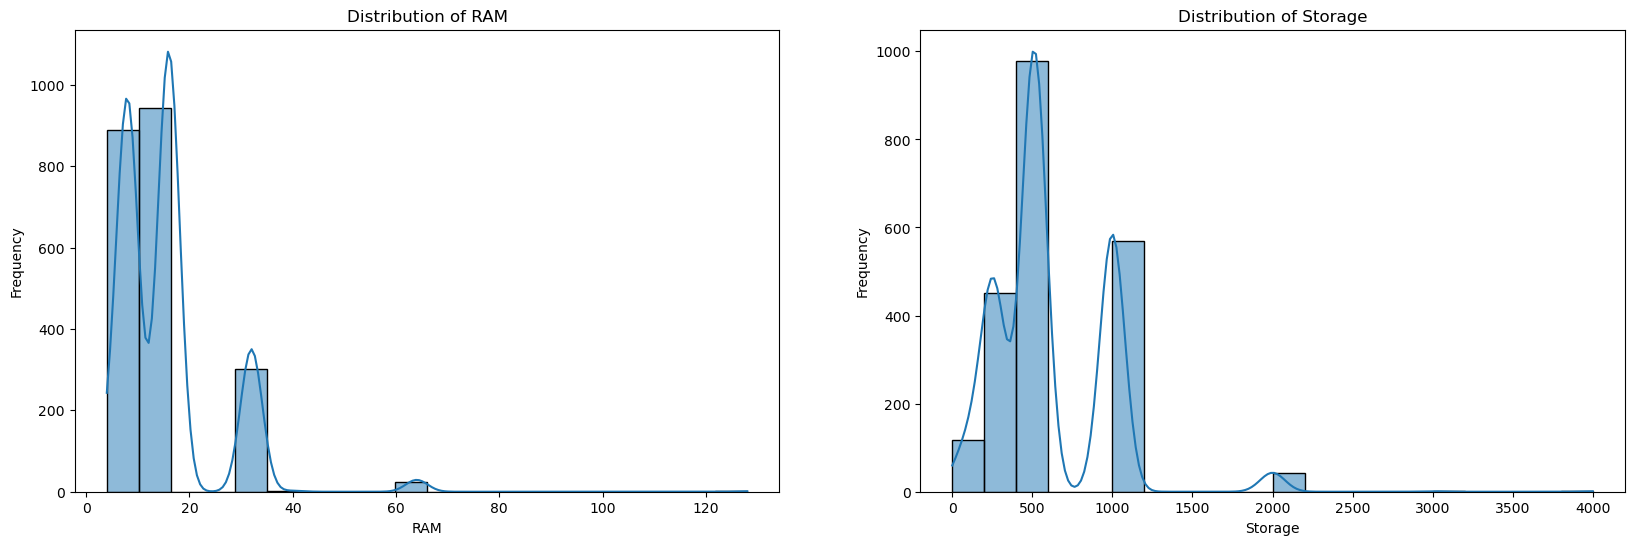

In [11]:
# Univariate Histogram
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['RAM'], bins=20, kde=True)
plt.title('Distribution of RAM')
plt.xlabel('RAM')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['Storage'], bins=20, kde=True)
plt.title('Distribution of Storage')
plt.xlabel('Storage')
plt.ylabel('Frequency')

plt.show()

In [12]:
# Inference: 

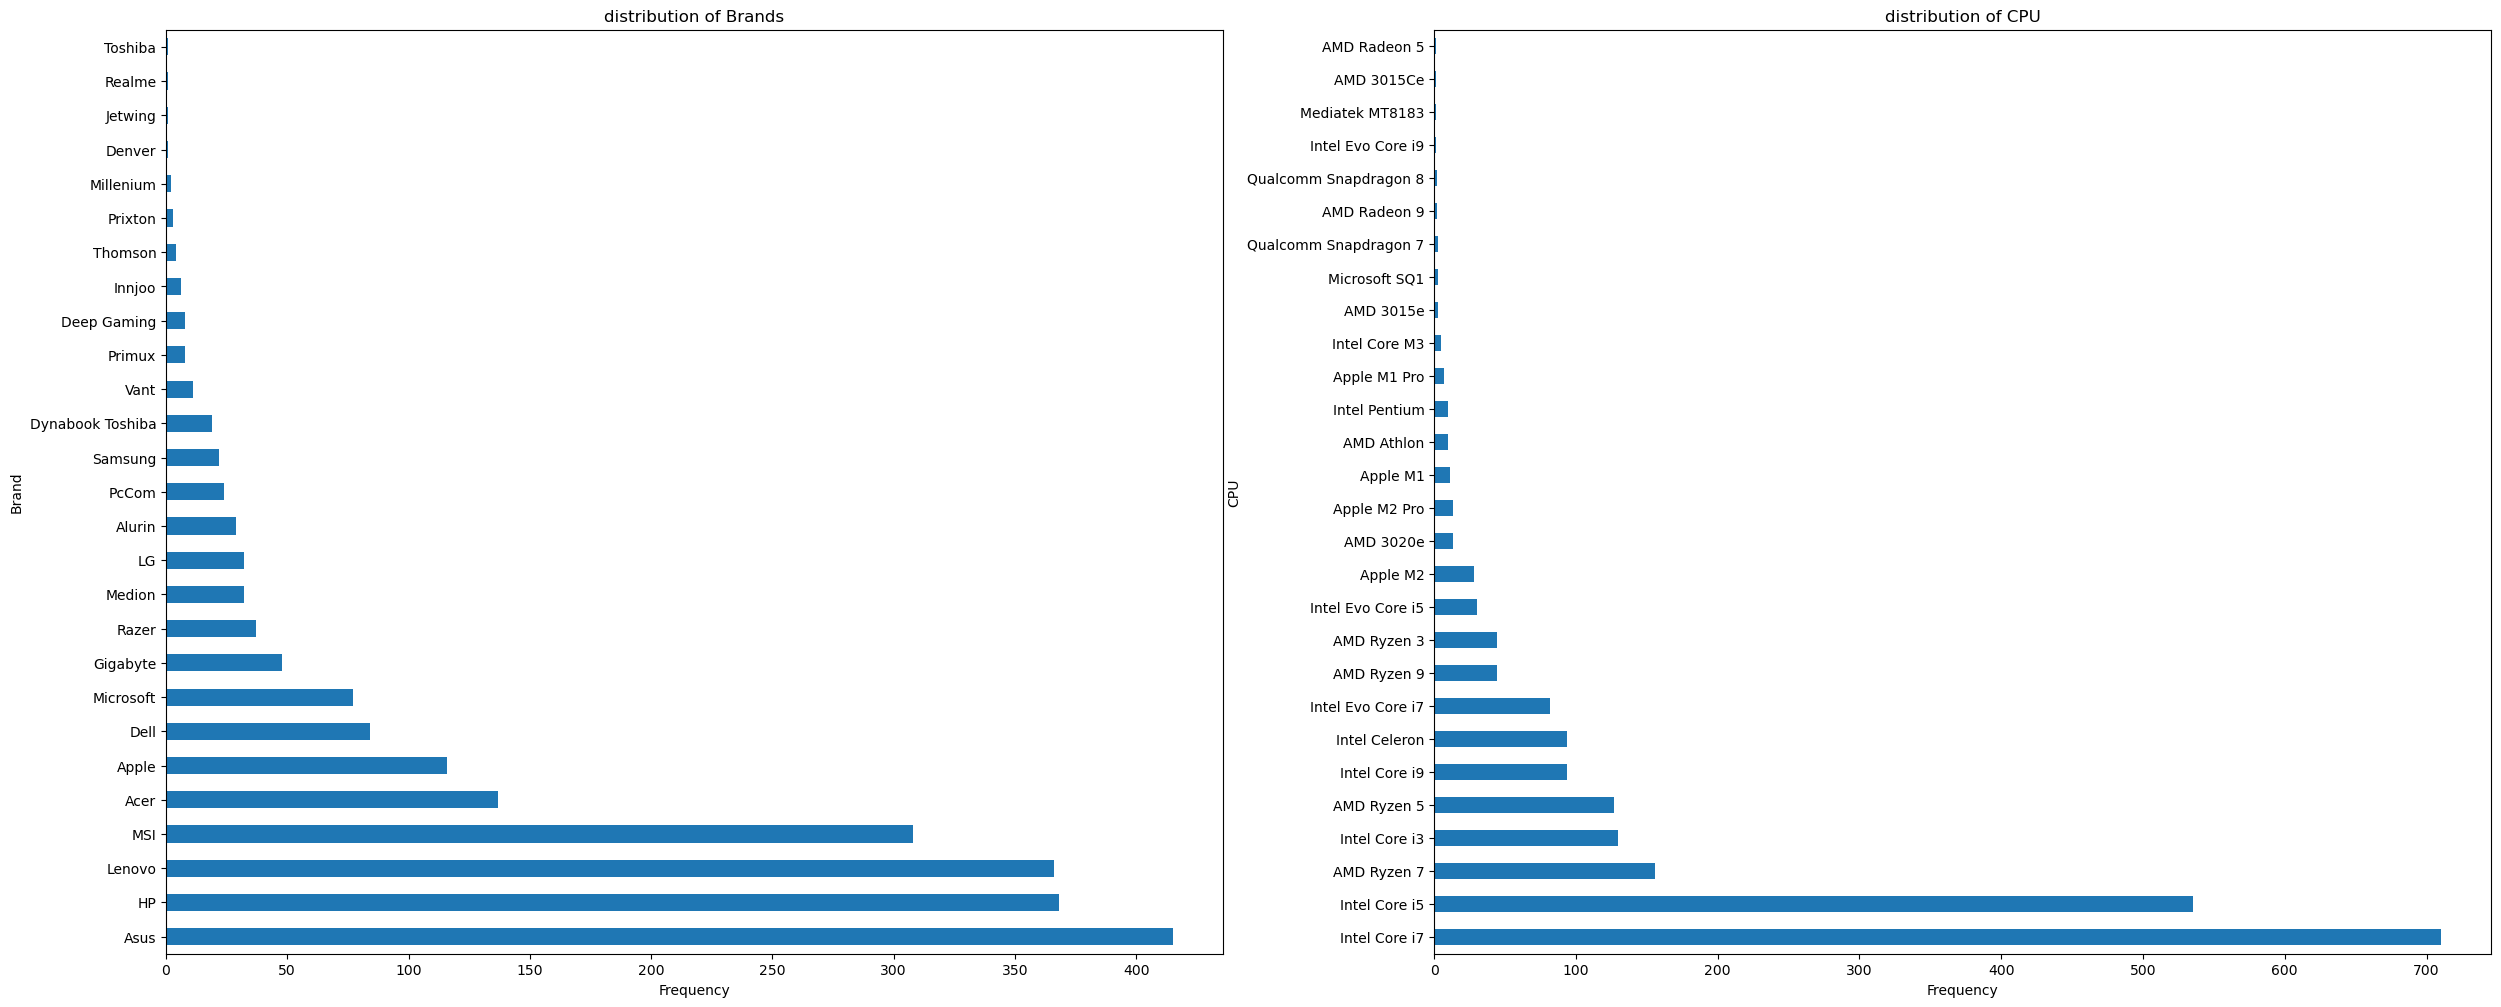

In [13]:
# Univariate Histogram
plt.figure(figsize=(30,12))
plt.subplot(1,2,1)
df['Brand'].value_counts().plot(kind='barh')
plt.title('distribution of Brands')
plt.ylabel('Brand')
plt.xlabel('Frequency')

plt.subplot(1,2,2)
df['CPU'].value_counts().plot(kind='barh')
plt.title('distribution of CPU')
plt.ylabel('CPU')
plt.xlabel('Frequency')
plt.show()

In [14]:
# inference: 1. Asus, Hp, Lenovo, MSI,Acer, Apple and dell have most frequncy amog all the brands.
# inference: 2. IntelCore i7, IntelCore i5, Amd ryzen 7 , IntelCore i3 and Amd ryzen 5 are most freqeunt cpu's

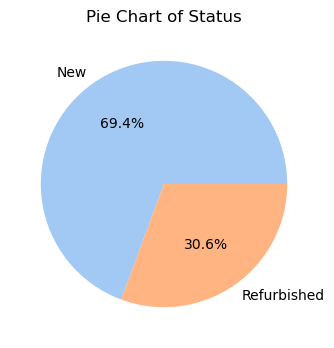

In [15]:
plt.figure(figsize=(6, 4))
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Status')
plt.ylabel('')
plt.show()

In [16]:
# Inference: 69.4% laptops are New and 30.6% are refurbished.

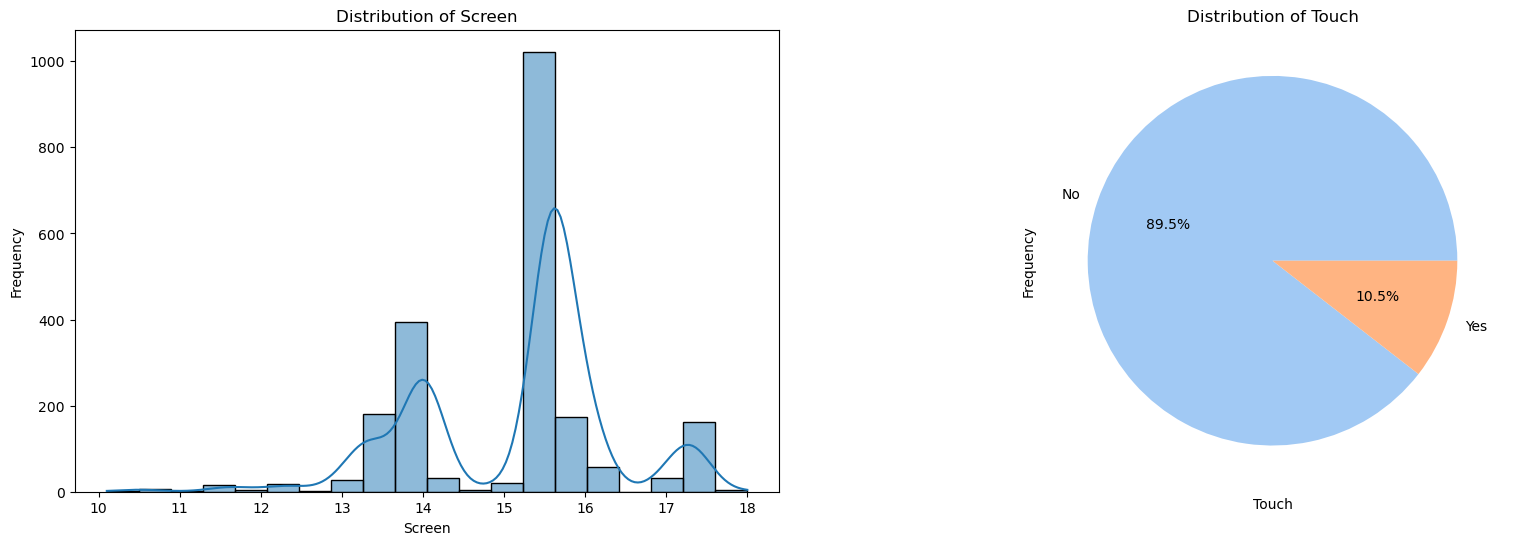

In [17]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['Screen'], bins=20, kde=True)
plt.title('Distribution of Screen')
plt.xlabel('Screen')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
df['Touch'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
#sns.pi(df['Touch'], bins=20, kde=True)
plt.title('Distribution of Touch')
plt.xlabel('Touch')
plt.ylabel('Frequency')

plt.show()

In [18]:
# Inference: 1.screen size is highly distributed in range 13+ upto 16
# Inference: 2.only 10.5% laptops are touch screen, rest are non touch

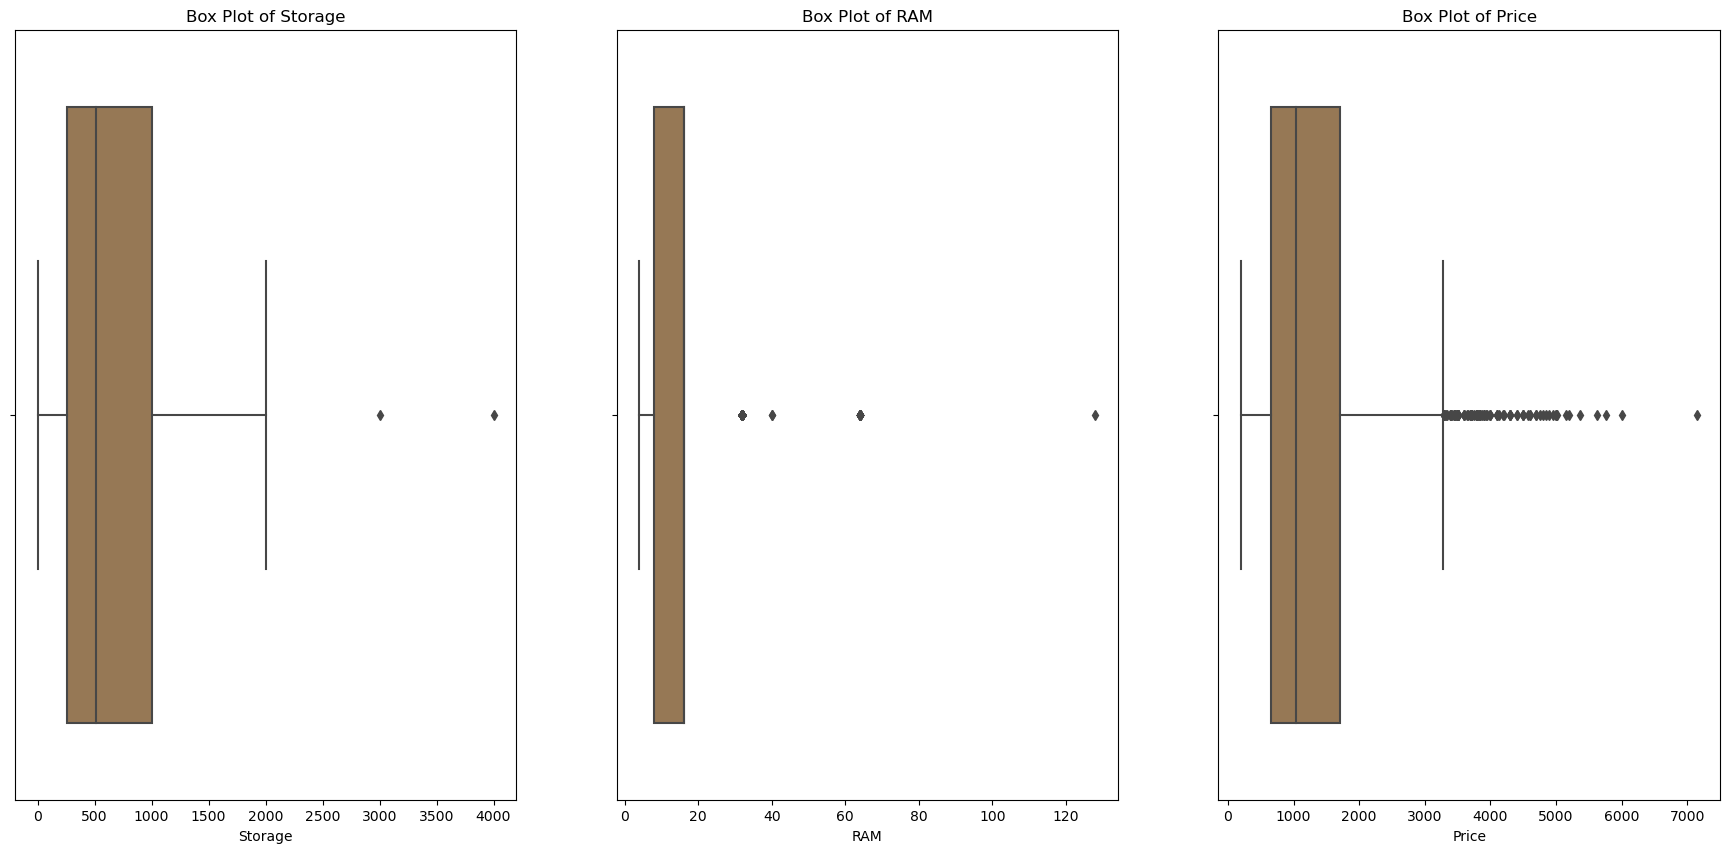

In [19]:
plt.figure(figsize=(22, 10))

plt.subplot(1,3,1)
sns.boxplot(x=df['Storage'],palette = ("cubehelix"))
plt.title('Box Plot of Storage')
plt.xlabel('Storage')

plt.subplot(1,3,2)
sns.boxplot(x=df['RAM'] ,palette = ("cubehelix"))
plt.title('Box Plot of RAM')
plt.xlabel('RAM')

plt.subplot(1,3,3)
sns.boxplot(x=df['Final Price'],palette = ("cubehelix"))
plt.title('Box Plot of Price')
plt.xlabel('Price')

plt.show()

In [20]:
# Inference: there are less outiers in RAM and Storage but many are present in Price.

Text(0, 0.5, 'RAM')

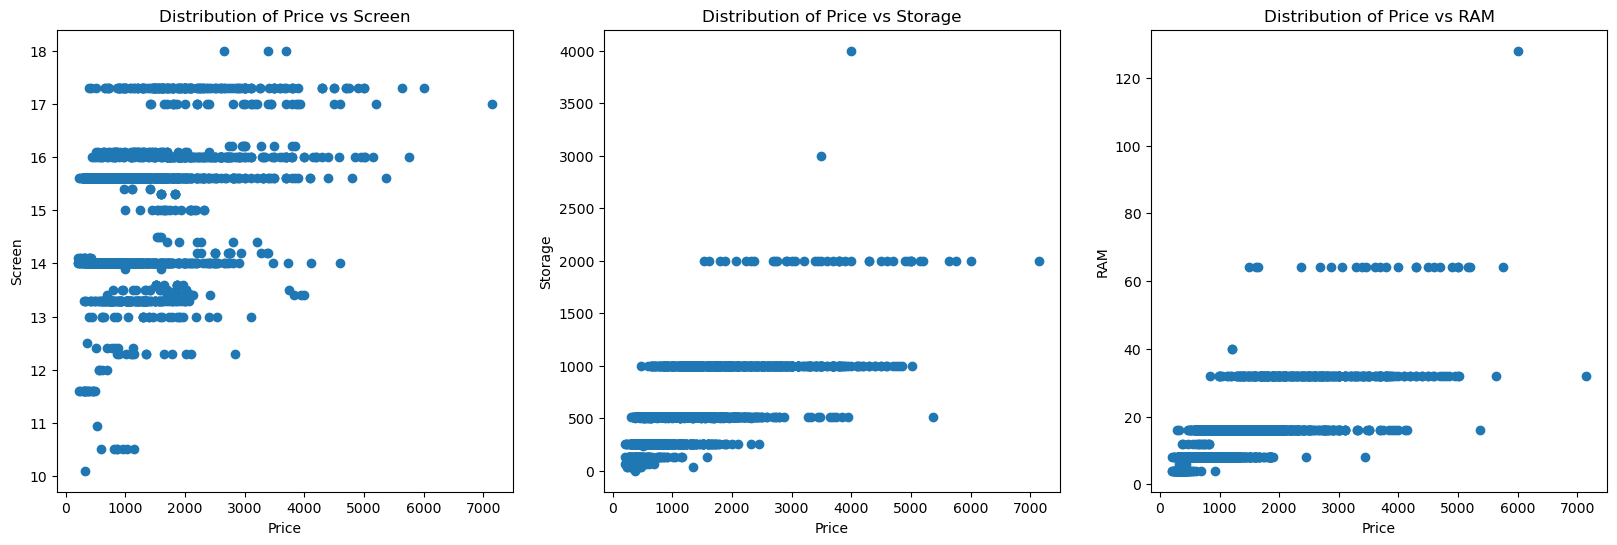

In [21]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.scatter(x='Final Price', y='Screen', data=df)
plt.title('Distribution of Price vs Screen')
plt.xlabel('Price')
plt.ylabel('Screen')

plt.subplot(1,3,2)
plt.scatter(x='Final Price', y='Storage', data=df)
plt.title('Distribution of Price vs Storage')
plt.xlabel('Price')
plt.ylabel('Storage')

plt.subplot(1,3,3)
plt.scatter(x='Final Price', y='RAM', data=df)
plt.title('Distribution of Price vs RAM')
plt.xlabel('Price')
plt.ylabel('RAM')

Text(0, 0.5, 'Screen')

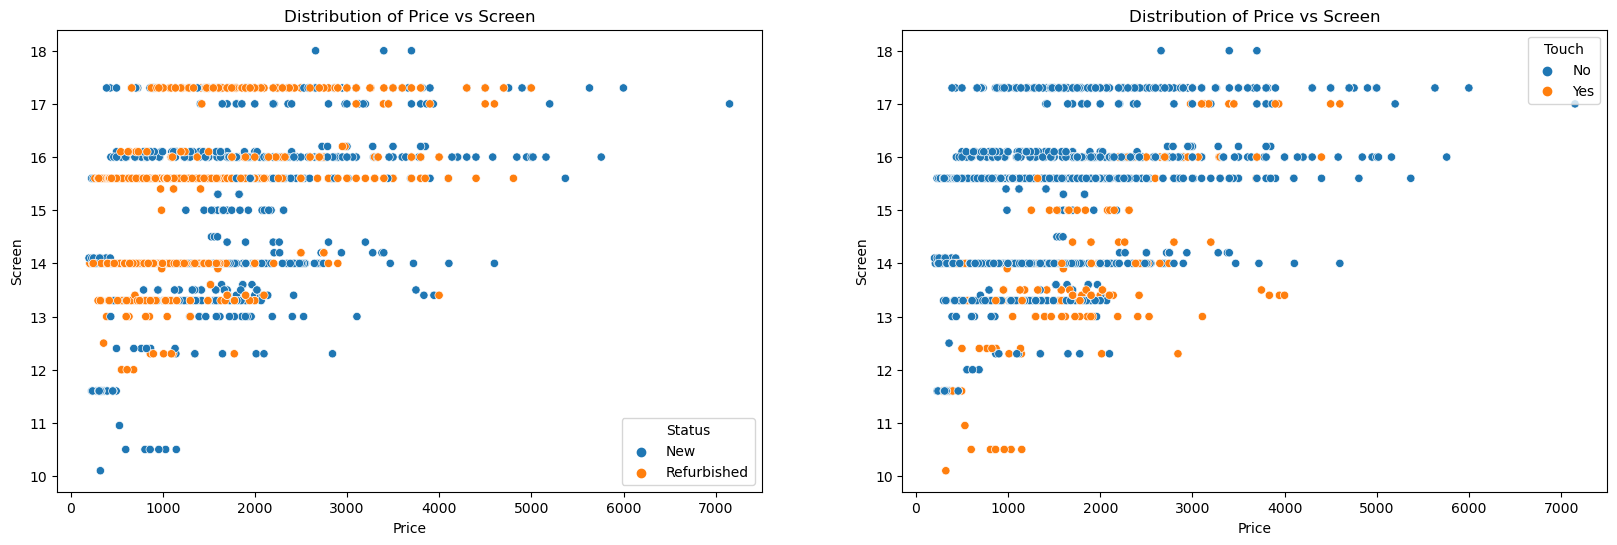

In [22]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.scatterplot(x='Final Price', y='Screen', hue='Status' ,data=df)
plt.title('Distribution of Price vs Screen')
plt.xlabel('Price')
plt.ylabel('Screen')

plt.subplot(1,2,2)

sns.scatterplot(x='Final Price', y='Screen', hue='Touch' ,data=df)
plt.title('Distribution of Price vs Screen')
plt.xlabel('Price')
plt.ylabel('Screen')

In [23]:
# Inference: 1. For same screen size, new laptops are priced more as compared to that of refurbished.
# Inference: 2. For same screen size, touch laptop are priced more as compared to that of non touch.

### data pre processing

In [24]:
df = df.dropna()

In [25]:
df.shape

(781, 12)

In [26]:
df=df.drop_duplicates()

In [27]:
df.shape

(781, 12)

In [28]:
df = df.drop(columns=['Laptop','GPU'])

In [29]:
df.shape

(781, 10)

In [30]:
df_num = df.select_dtypes(include='number')

In [31]:
df_num.head()

,RAM,Storage,Screen,Final Price
3,16,1000,15.6,1199.0
5,32,1000,17.3,1699.0
9,16,512,16.1,1149.0
11,16,1000,15.6,1399.0
12,16,512,15.6,1199.0


In [32]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [33]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [34]:
df.shape

(522, 10)

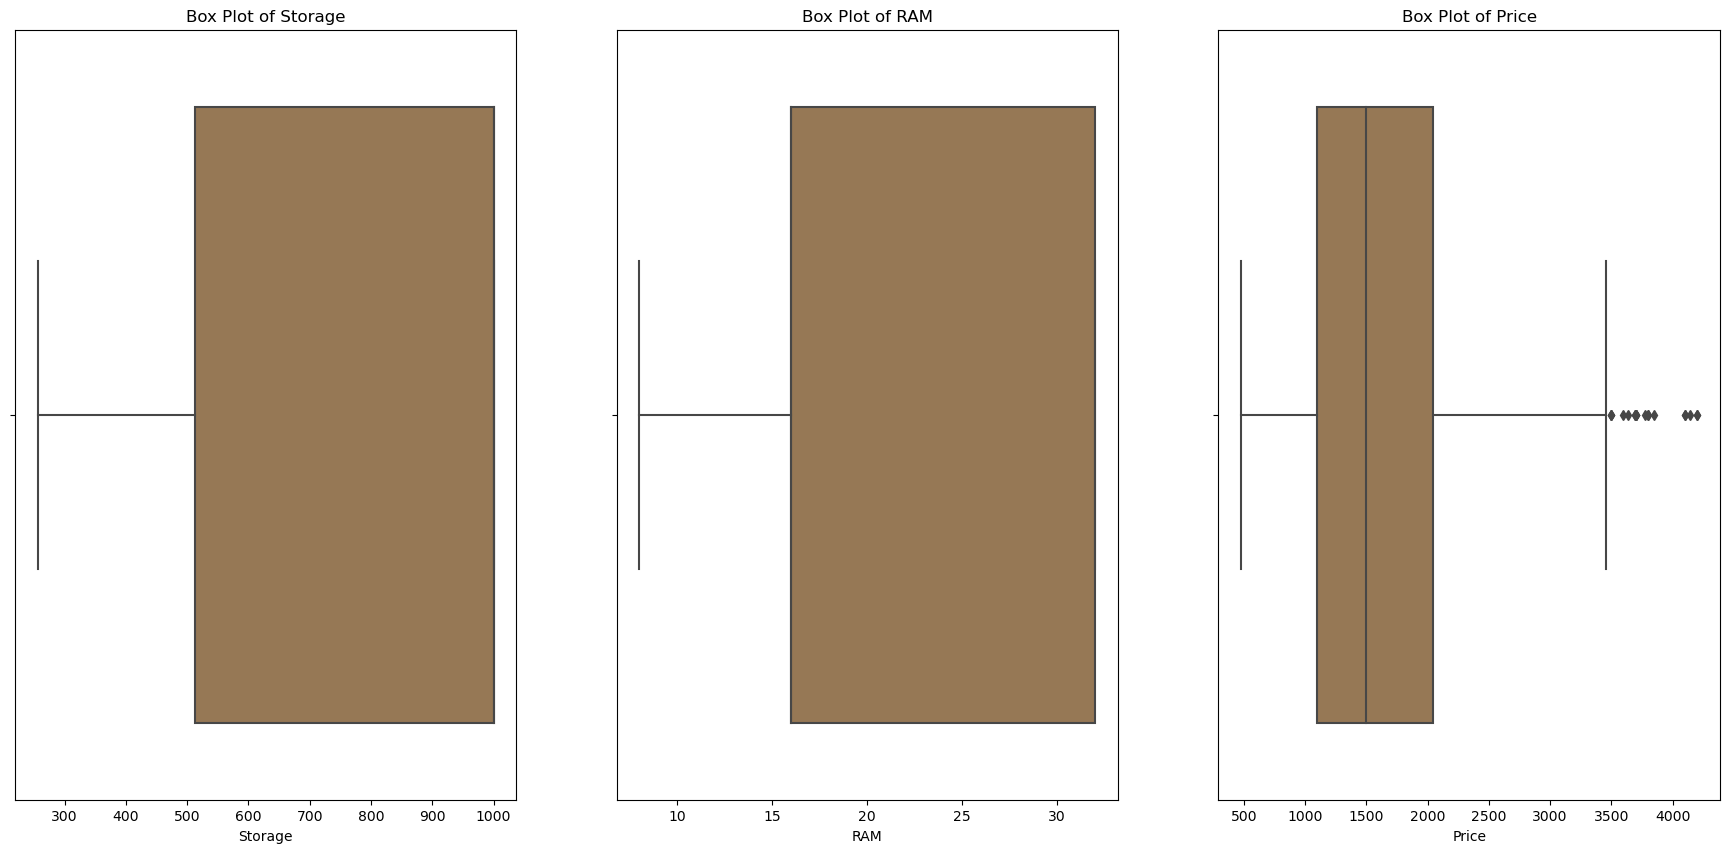

In [35]:
plt.figure(figsize=(22, 10))

plt.subplot(1,3,1)
sns.boxplot(x=df['Storage'],palette = ("cubehelix"))
plt.title('Box Plot of Storage')
plt.xlabel('Storage')

plt.subplot(1,3,2)
sns.boxplot(x=df['RAM'] ,palette = ("cubehelix"))
plt.title('Box Plot of RAM')
plt.xlabel('RAM')

plt.subplot(1,3,3)
sns.boxplot(x=df['Final Price'],palette = ("cubehelix"))
plt.title('Box Plot of Price')
plt.xlabel('Price')

plt.show()

In [36]:
# removed most of the outliers

In [37]:
X = df.drop('Final Price', axis=1)
y = df['Final Price']
X.head()

,Status,Brand,Model,CPU,RAM,Storage,Storage type,Screen,Touch
3,New,MSI,Katana,Intel Core i7,16,1000,SSD,15.6,No
9,New,HP,Victus,Intel Core i7,16,512,SSD,16.1,No
11,New,MSI,Thin,Intel Core i7,16,1000,SSD,15.6,No
12,New,Asus,ROG,AMD Ryzen 7,16,512,SSD,15.6,No
19,New,MSI,Thin,Intel Core i7,16,512,SSD,15.6,No


In [38]:
y.head()

3     1199.0
9     1149.0
11    1399.0
12    1199.0
19     999.0
Name: Final Price, dtype: float64

In [39]:
X_num = X.select_dtypes('number')
X_cat = X.select_dtypes('object')

X_num.head()

,RAM,Storage,Screen
3,16,1000,15.6
9,16,512,16.1
11,16,1000,15.6
12,16,512,15.6
19,16,512,15.6


In [40]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [41]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [42]:
X_num_scaled.head()

,RAM,Storage,Screen
3,0.333333,1.000000,0.285714
9,0.333333,0.344086,1.000000
11,0.333333,1.000000,0.285714
12,0.333333,0.344086,0.285714
19,0.333333,0.344086,0.285714


In [43]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  

In [44]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [45]:
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
RAM                      0
Storage                  0
Screen                   0
Status_New               0
Status_Refurbished       0
                        ..
CPU_Intel Evo Core i7    0
CPU_Intel Evo Core i9    0
Storage type_SSD         0
Touch_No                 0
Touch_Yes                0
Length: 87, dtype: int64
0
(522, 87)
(522,)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

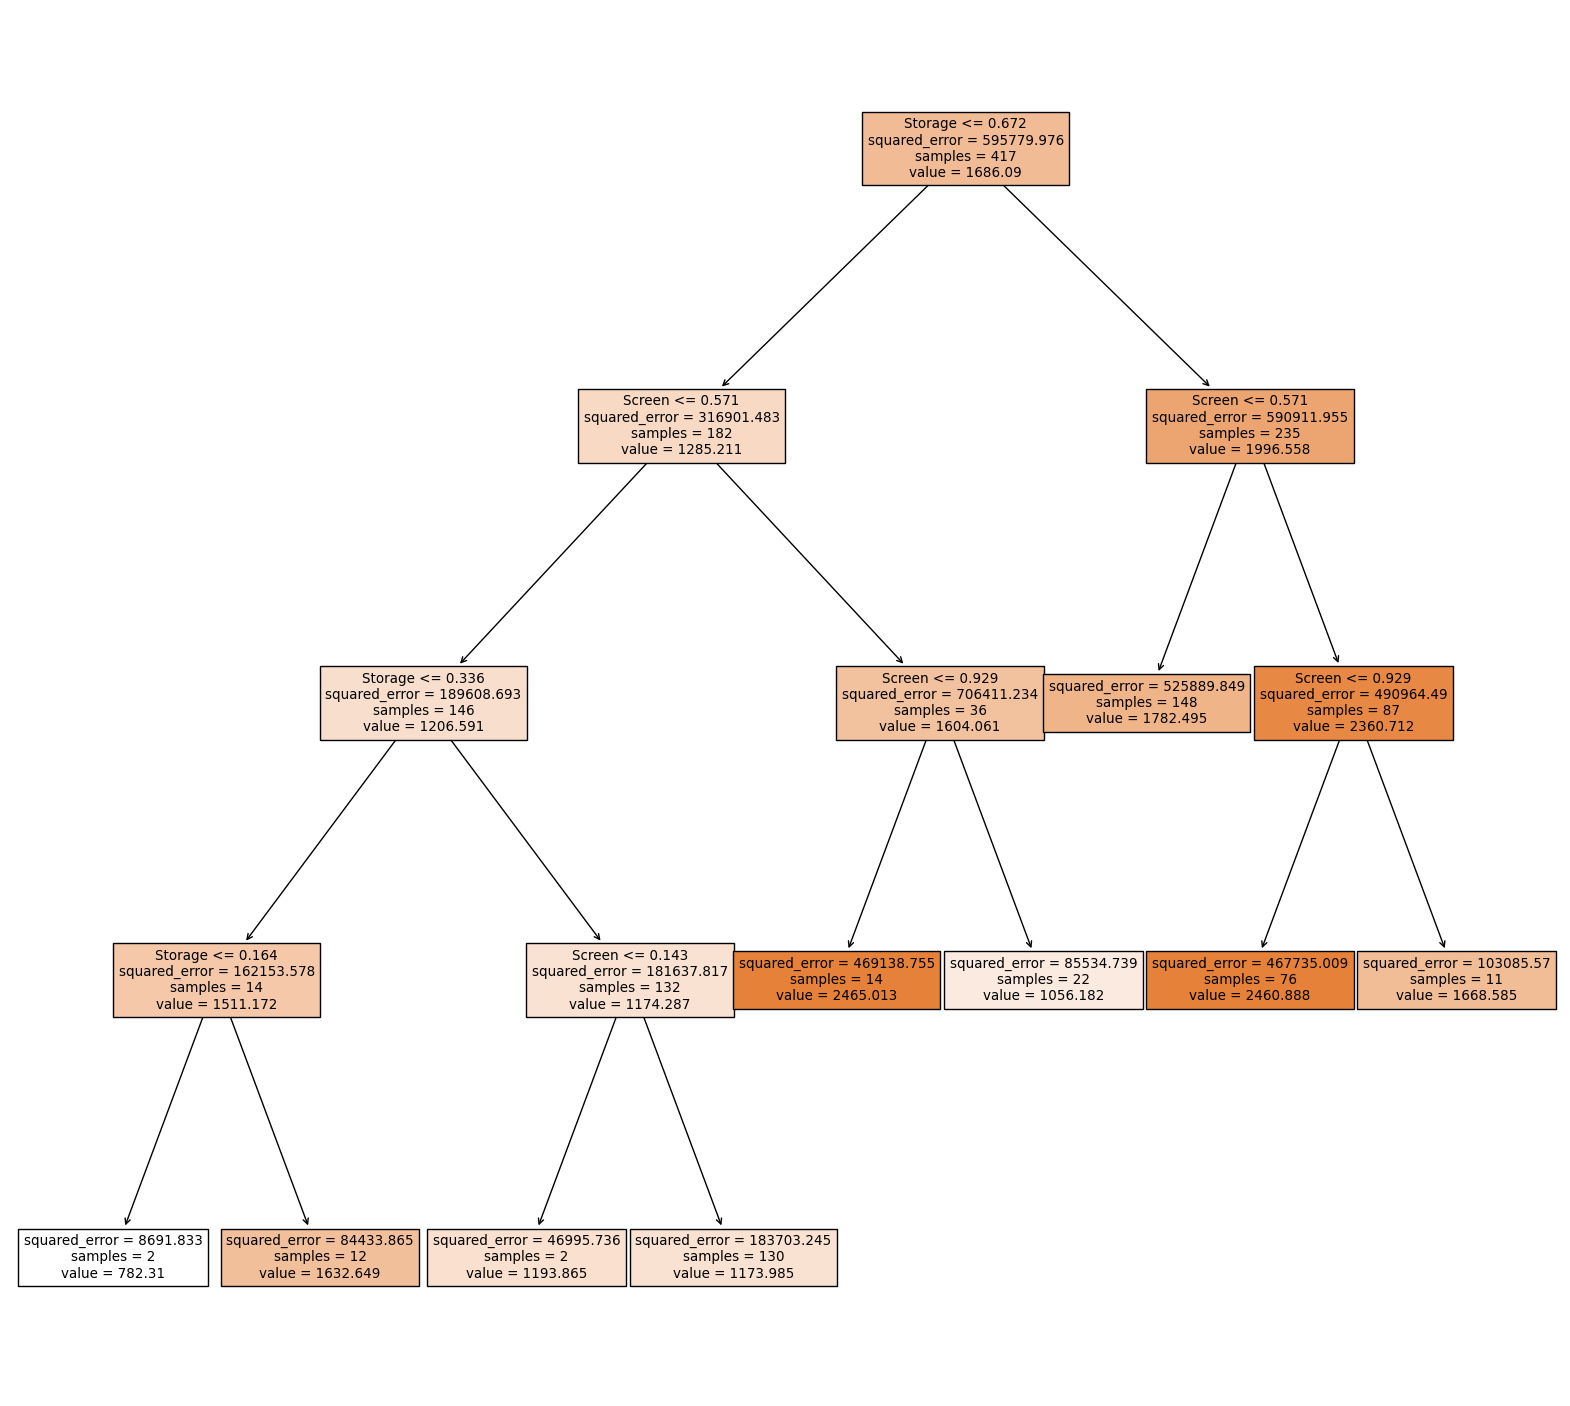

In [47]:
# Extract features and target
X = X_train[['Screen', 'Storage']]
y = y_train

# Create the decision tree regression model
regressor = DecisionTreeRegressor(max_depth=4)

# Fit the model to the data
regressor.fit(X, y)

# Display the decision tree
fig = plt.figure(figsize=(20, 18))
_ = tree.plot_tree(regressor, feature_names=['Screen', 'Storage'], filled=True)

plt.show()

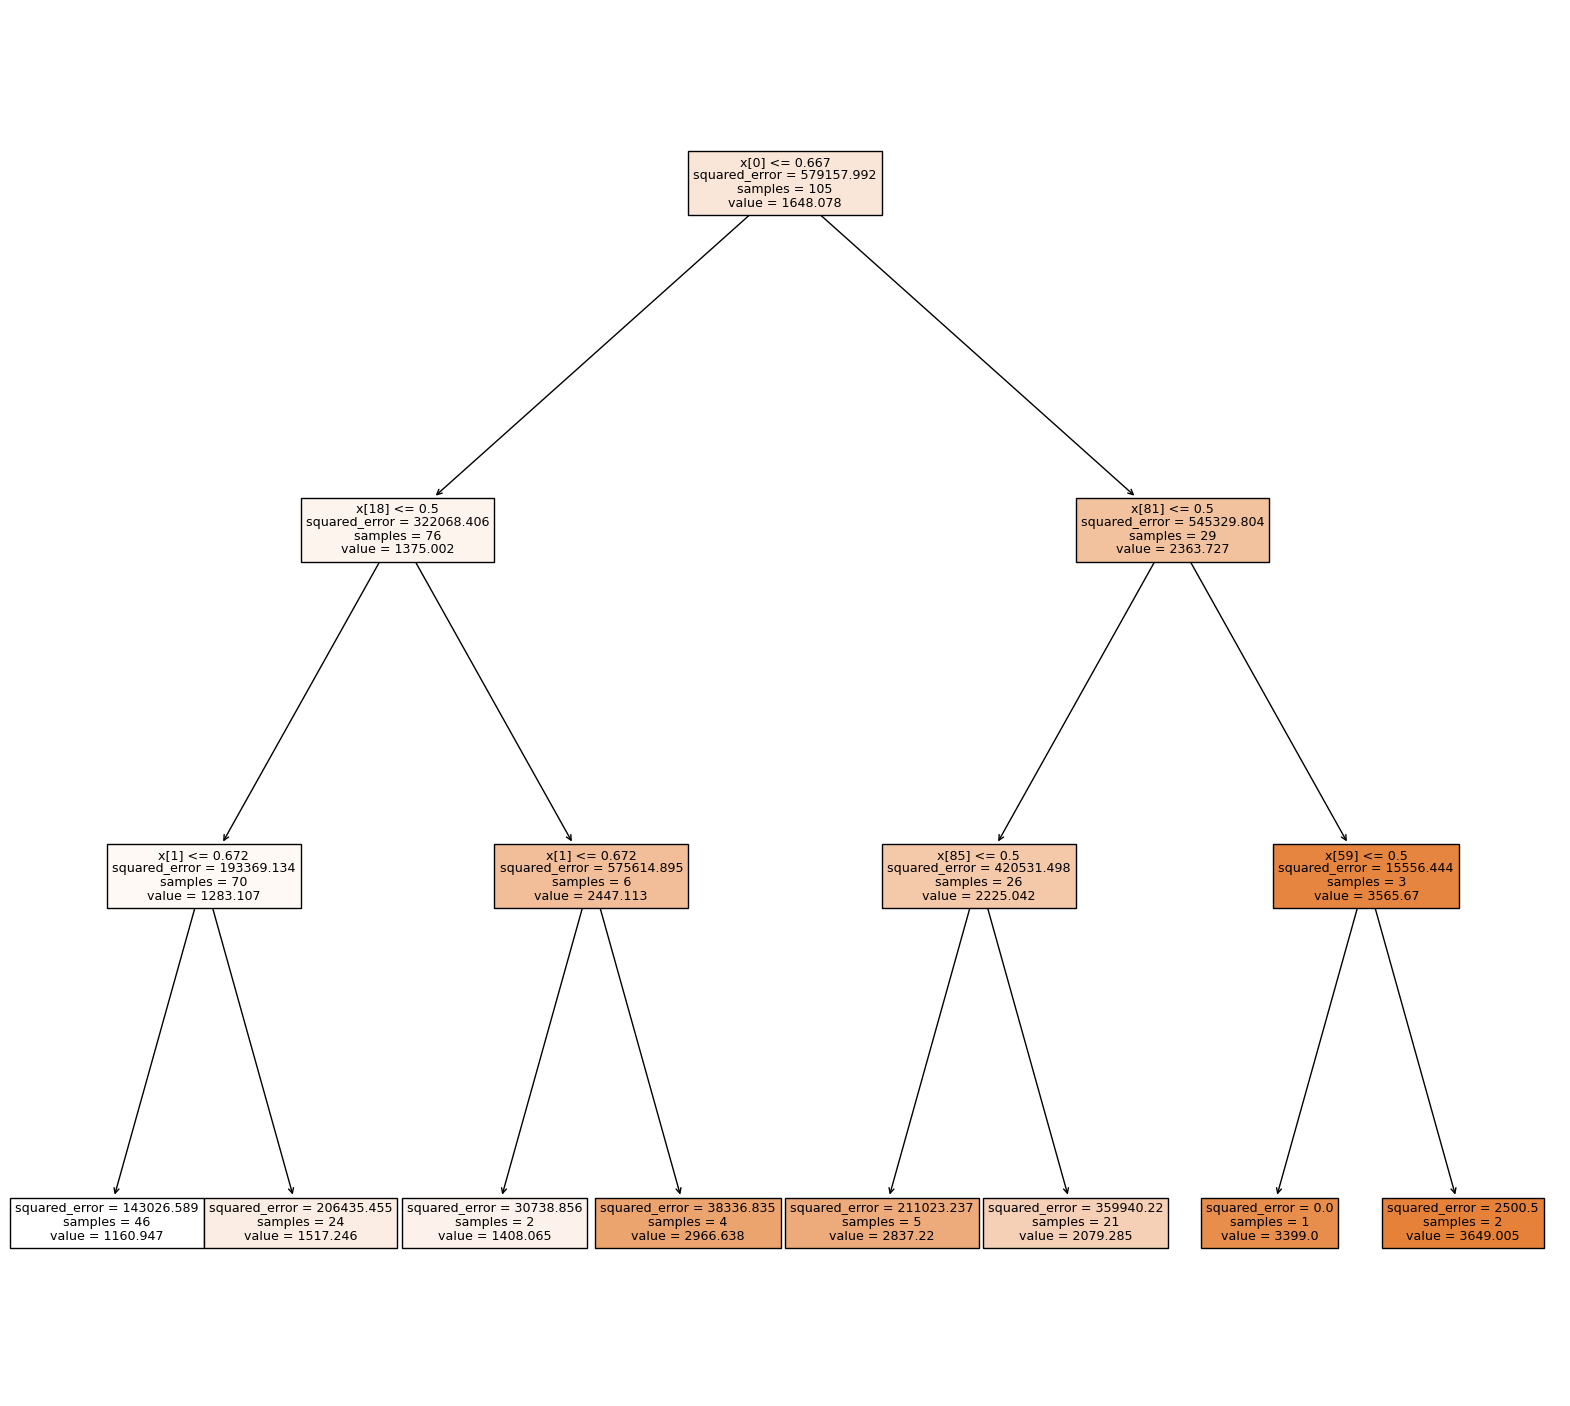

In [48]:
# Extract features and target
X = X_test
y = y_test

# Create the decision tree regression model
regressor = DecisionTreeRegressor(max_depth=3)

# Fit the model to the data
regressor.fit(X, y)

# Display the decision tree
fig = plt.figure(figsize=(20, 18))
_ = tree.plot_tree(regressor,  filled=True)

plt.show()

In [49]:
d_values = np.arange(1,6,1)
train_mape_scores = []
test_mape_scores = []

In [50]:
for i in d_values:
    DT = DecisionTreeRegressor(max_depth=i)
    DT.fit(X_train, y_train)
    
    train_pred = DT.predict(X_train)
    test_pred = DT.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)

In [51]:
train_mape_scores

[0.3490847201411658,
 0.3210376648507649,
 0.30810604898486504,
 0.26678903210065497,
 0.23729577839302046]

In [52]:
test_mape_scores

[0.3551485519910949,
 0.3347371736874148,
 0.318206714192777,
 0.2903444872843007,
 0.2811255803228516]

ValueError: x and y must have same first dimension, but have shapes (1,) and (5,)

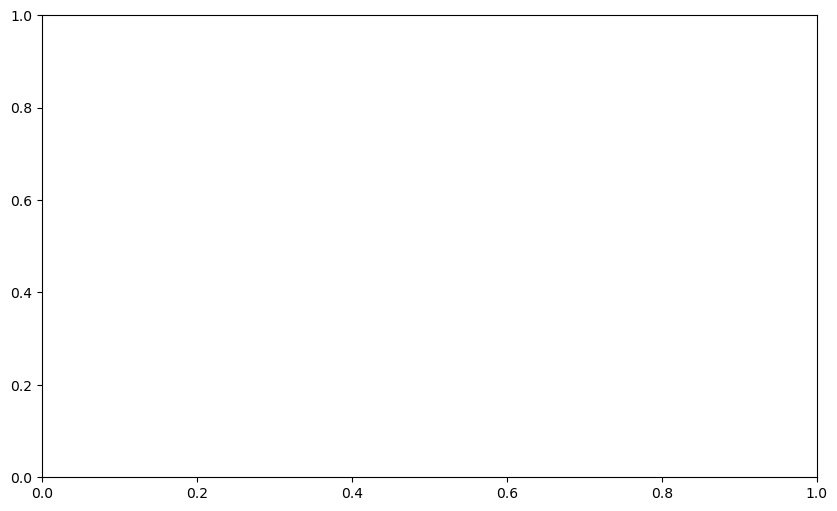

In [55]:
k_values
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('Max depth value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different depth values in decision tree Regressor')
plt.legend()
plt.show()